/home/neoph/dev/Train/.tenv312/lib/python3.12/site-packages/onnxscript/converter.py:823: FutureWarning: 'onnxscript.values.Op.param_schemas' is deprecated in version 0.1 and will be removed in the future. Please use '.op_signature' instead.
  param_schemas = callee.param_schemas()
/home/neoph/dev/Train/.tenv312/lib/python3.12/site-packages/onnxscript/converter.py:823: FutureWarning: 'onnxscript.values.OnnxFunction.param_schemas' is deprecated in version 0.1 and will be removed in the future. Please use '.op_signature' instead.
  param_schemas = callee.param_schemas()


=== Dataset A ===
Num images: 5000
Num instances: 229852
Width  mean/median/min/max: 60.386173248291016 53.894744873046875 10.622406005859375 342.124755859375
Height mean/median/min/max: 60.0000114440918 53.562225341796875 10.586463928222656 259.02191162109375
Area   mean/median/min/max: 3843.544921875 2927.65185546875 183.39268493652344 43274.38671875
Per-class counts:
  A1: 9999
  A2: 10000
  A3: 10000
  B4: 10001
  B5: 10001
  C6: 9997
  C7: 10002
  C8: 10001
  C9: 9997
  C10: 9997
  C11: 9996
  C12: 9998
  D13: 9998
  D14: 9993
  D15: 10000
  E16: 9995
  E17: 9996
  E18: 10003
  F19: 9993
  F20: 9997
  G21: 9997
  G22: 9993
   X: 7334
   Y: 2564


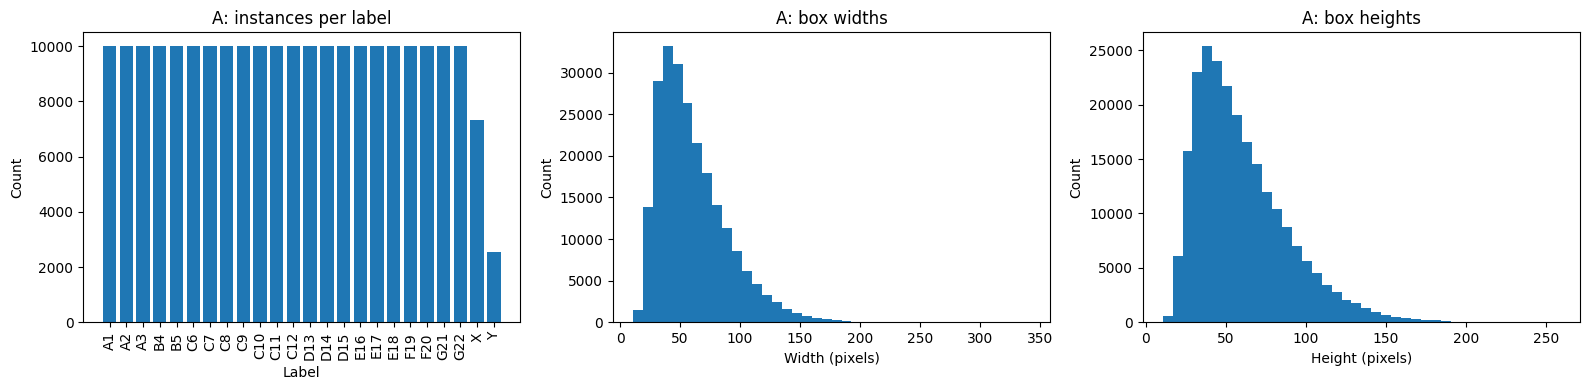

=== Dataset B_train ===
Num images: 527
Num instances: 22564
Width  mean/median/min/max: 39.14818572998047 35.199981689453125 11.578948974609375 155.60000610351562
Height mean/median/min/max: 39.445919036865234 35.20001220703125 9.600006103515625 155.19998168945312
Area   mean/median/min/max: 1601.5460205078125 1259.680419921875 153.60009765625 14530.55859375
Per-class counts:
  A1: 1016
  A2: 1000
  A3: 988
  B4: 998
  B5: 1003
  C6: 997
  C7: 993
  C8: 965
  C9: 997
  C10: 987
  C11: 981
  C12: 988
  D13: 988
  D14: 974
  D15: 973
  E16: 981
  E17: 977
  E18: 955
  F19: 956
  F20: 956
  G21: 972
  G22: 966
   X: 694
   Y: 259


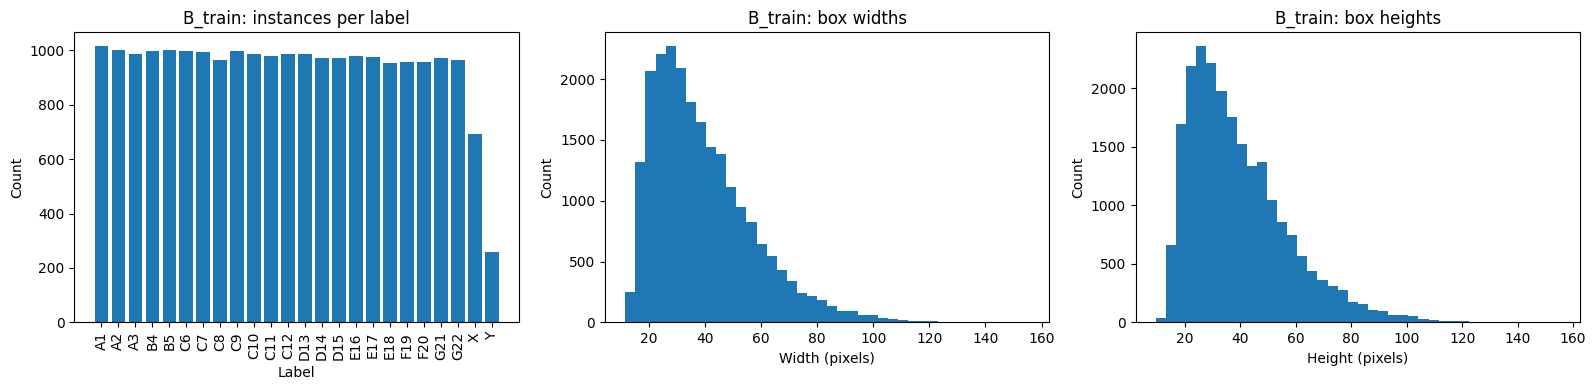

=== Dataset B_test ===
Num images: 67
Num instances: 2873
Width  mean/median/min/max: 37.356868743896484 33.62469482421875 12.631576538085938 126.0
Height mean/median/min/max: 37.52779769897461 33.600006103515625 12.26007080078125 111.99998474121094
Area   mean/median/min/max: 1448.0531005859375 1136.80029296875 243.44241333007812 8098.55859375
Per-class counts:
  A1: 131
  A2: 128
  A3: 127
  B4: 126
  B5: 124
  C6: 127
  C7: 128
  C8: 122
  C9: 129
  C10: 129
  C11: 128
  C12: 126
  D13: 122
  D14: 121
  D15: 126
  E16: 125
  E17: 125
  E18: 119
  F19: 116
  F20: 123
  G21: 124
  G22: 123
   X: 100
   Y: 24


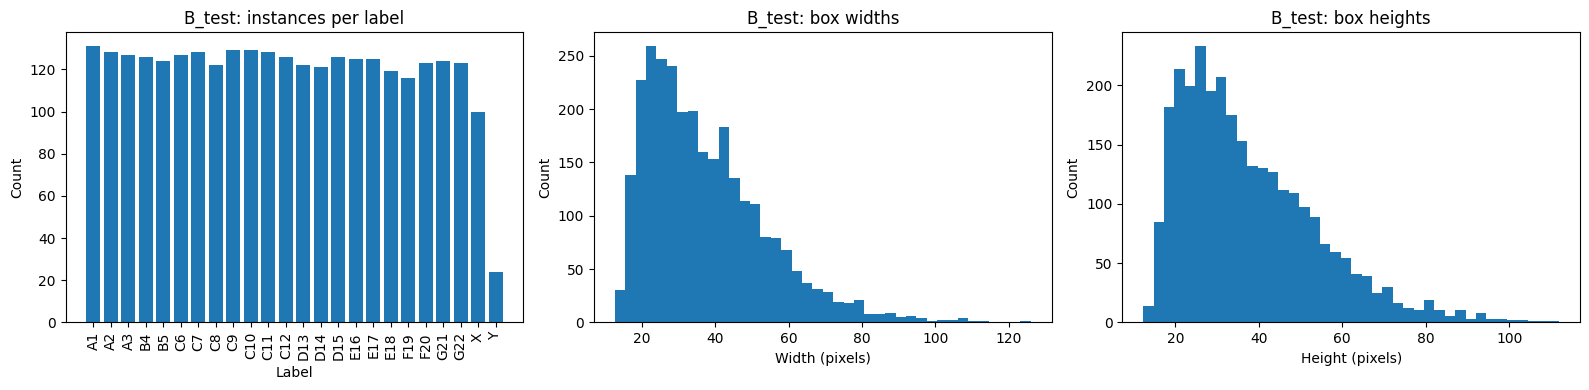

=== Dataset B_all ===
Num images: 594
Num instances: 25437
Width  mean/median/min/max: 38.94586944580078 34.83868408203125 11.578948974609375 155.60000610351562
Height mean/median/min/max: 39.22927474975586 35.199981689453125 9.600006103515625 155.19998168945312
Area   mean/median/min/max: 1584.2095947265625 1248.000244140625 153.60009765625 14530.55859375
Per-class counts:
  A1: 1147
  A2: 1128
  A3: 1115
  B4: 1124
  B5: 1127
  C6: 1124
  C7: 1121
  C8: 1087
  C9: 1126
  C10: 1116
  C11: 1109
  C12: 1114
  D13: 1110
  D14: 1095
  D15: 1099
  E16: 1106
  E17: 1102
  E18: 1074
  F19: 1072
  F20: 1079
  G21: 1096
  G22: 1089
   X: 794
   Y: 283


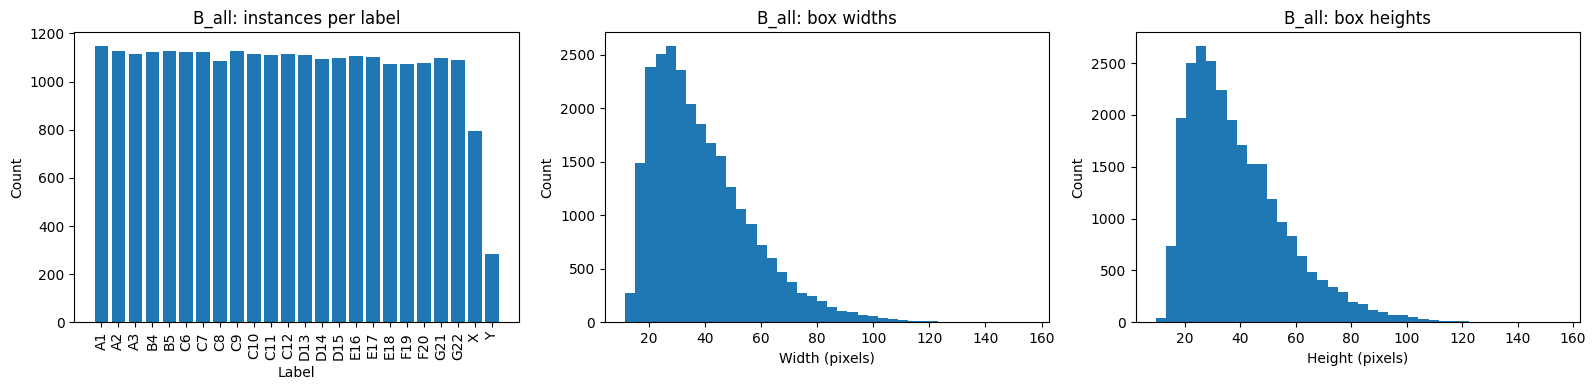

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from datasets import DatasetA, DatasetB

from datasets import cfg

from datasets import DatasetA, DatasetB, cfg

ds_a = DatasetA(cfg.root_a_xml, cfg.root_a_img, cfg.label_map, cfg.max_size)

ds_b_train = DatasetB(cfg.root_b, "train", cfg.label_map, cfg.max_size)
ds_b_test  = DatasetB(cfg.root_b, "test",  cfg.label_map, cfg.max_size)
ds_b_all   = DatasetB(cfg.root_b, "all",   cfg.label_map, cfg.max_size)

inv_label_map = {v: k for k, v in cfg.label_map.items()}

def analyze_dataset(name, dataset):
    all_labels = []
    widths, heights = [], []

    for i in range(len(dataset)):
        img_t, target = dataset[i]
        boxes = target["boxes"]
        labels = target["labels"]
        if boxes.numel() == 0:
            continue
        all_labels.extend(labels.tolist())
        wh = boxes[:, 2:] - boxes[:, :2]
        widths.extend(wh[:, 0].tolist())
        heights.extend(wh[:, 1].tolist())

    all_labels = np.array(all_labels, dtype=np.int64)
    widths = np.array(widths, dtype=np.float32)
    heights = np.array(heights, dtype=np.float32)

    areas = widths * heights

    print(f"=== Dataset {name} ===")
    print("Num images:", len(dataset))
    print("Num instances:", len(all_labels))
    print("Width  mean/median/min/max:",
          float(widths.mean()), float(np.median(widths)), float(widths.min()), float(widths.max()))
    print("Height mean/median/min/max:",
          float(heights.mean()), float(np.median(heights)), float(heights.min()), float(heights.max()))
    print("Area   mean/median/min/max:",
          float(areas.mean()), float(np.median(areas)), float(areas.min()), float(areas.max()))

    counts = Counter(all_labels.tolist())
    labels_sorted = sorted(counts.keys())
    counts_sorted = [counts[l] for l in labels_sorted]
    label_names = [inv_label_map[l] for l in labels_sorted]

    print("Per-class counts:")
    for l in labels_sorted:
        print(f"  {inv_label_map[l]:>2}: {counts[l]}")

    fig, axes = plt.subplots(1, 3, figsize=(16, 4))

    axes[0].bar(range(len(labels_sorted)), counts_sorted)
    axes[0].set_xticks(range(len(labels_sorted)))
    axes[0].set_xticklabels(label_names, rotation=90)
    axes[0].set_title(f"{name}: instances per label")
    axes[0].set_xlabel("Label")
    axes[0].set_ylabel("Count")

    axes[1].hist(widths, bins=40)
    axes[1].set_title(f"{name}: box widths")
    axes[1].set_xlabel("Width (pixels)")
    axes[1].set_ylabel("Count")

    axes[2].hist(heights, bins=40)
    axes[2].set_title(f"{name}: box heights")
    axes[2].set_xlabel("Height (pixels)")
    axes[2].set_ylabel("Count")

    plt.tight_layout()
    plt.show()


analyze_dataset("A", ds_a)
analyze_dataset("B_train", ds_b_train)
analyze_dataset("B_test",  ds_b_test)
analyze_dataset("B_all",   ds_b_all)

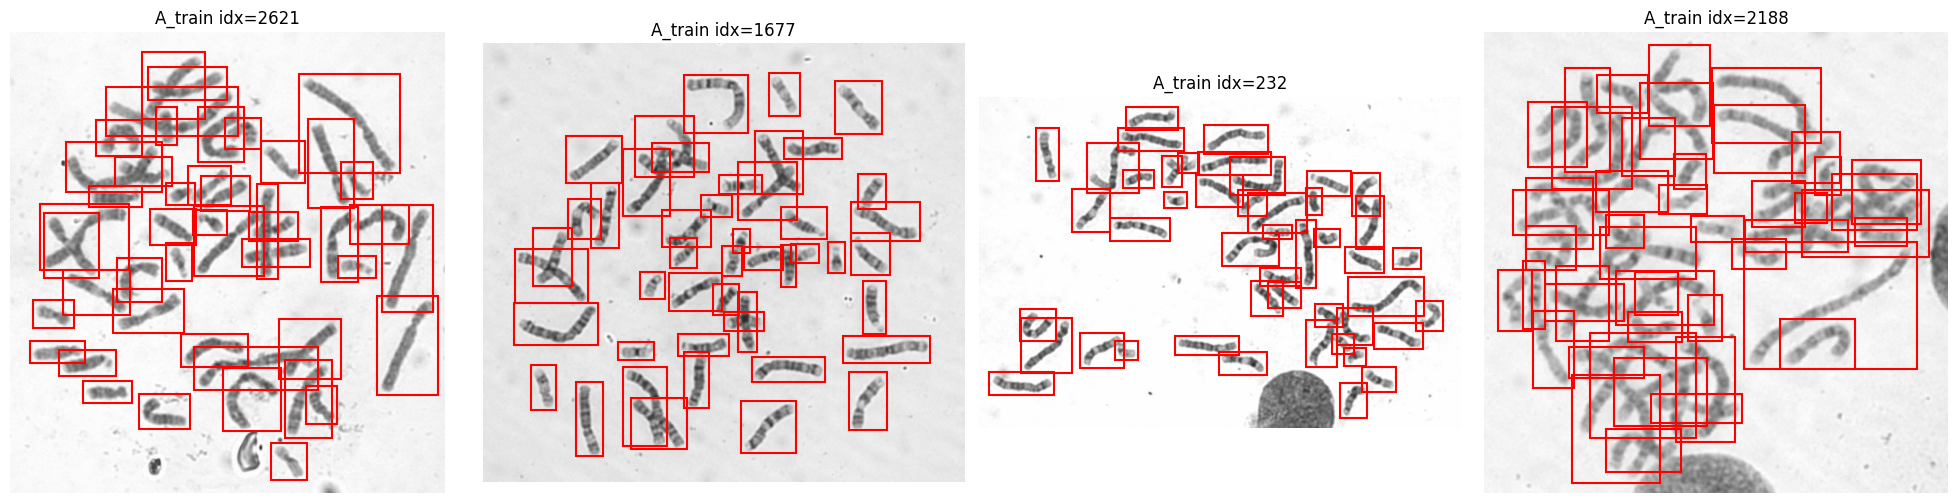

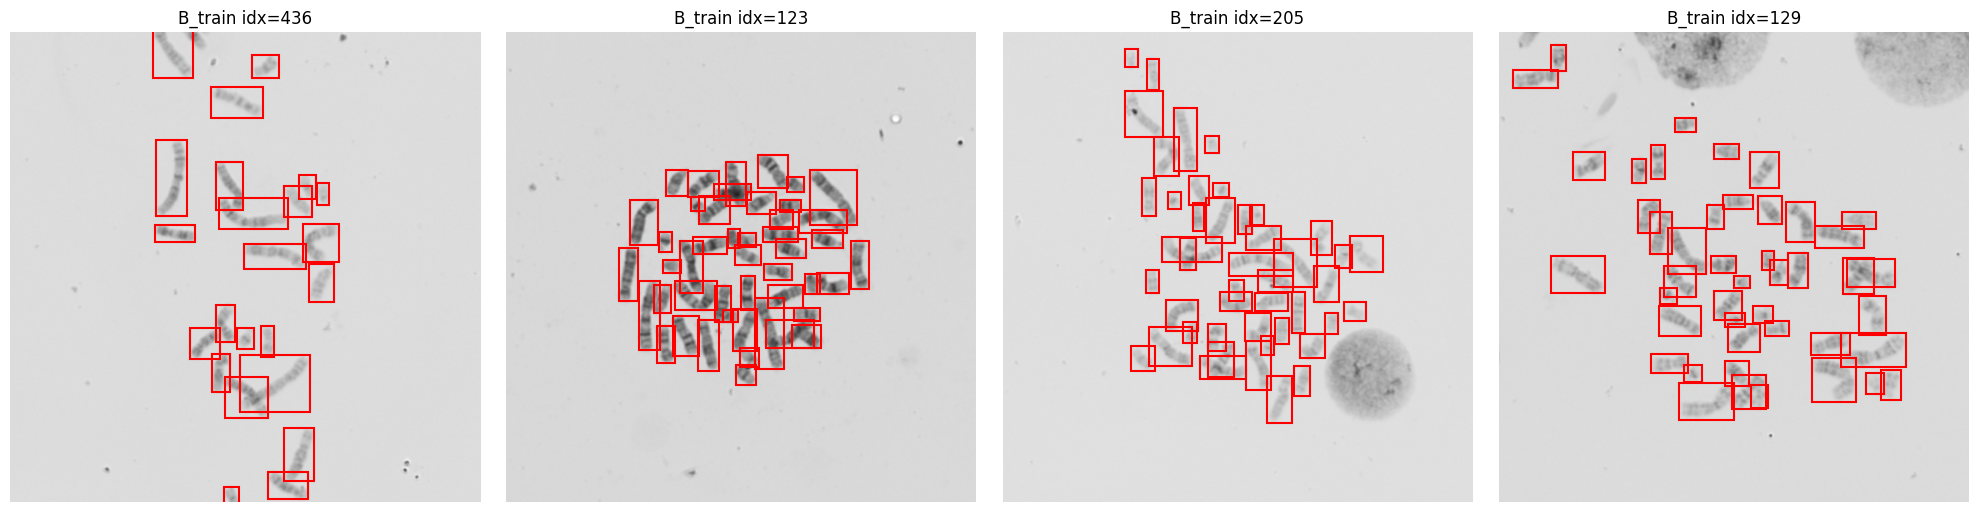

In [2]:
import random
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import json

def show_samples(name, dataset, n=4):
    idxs = random.sample(range(len(dataset)), n)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))
    if n == 1:
        axes = [axes]

    for ax, idx in zip(axes, idxs):
        img_t, target = dataset[idx]

        img = img_t * 0.5 + 0.5
        img = img.permute(1, 2, 0).cpu().numpy()
        img = np.clip(img, 0, 1)

        ax.imshow(img)

        boxes = target["boxes"]
        for box in boxes:
            x1, y1, x2, y2 = box.tolist()
            w, h = x2 - x1, y2 - y1
            rect = patches.Rectangle(
                (x1, y1),
                w, h,
                linewidth=1.5,
                edgecolor="r",
                facecolor="none"
            )
            ax.add_patch(rect)

        ax.set_title(f"{name} idx={idx}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()



show_samples("A_train", ds_a, n=4)
show_samples("B_train", ds_b_train, n=4)

/tmp/ipykernel_773979/3952065975.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", 20)


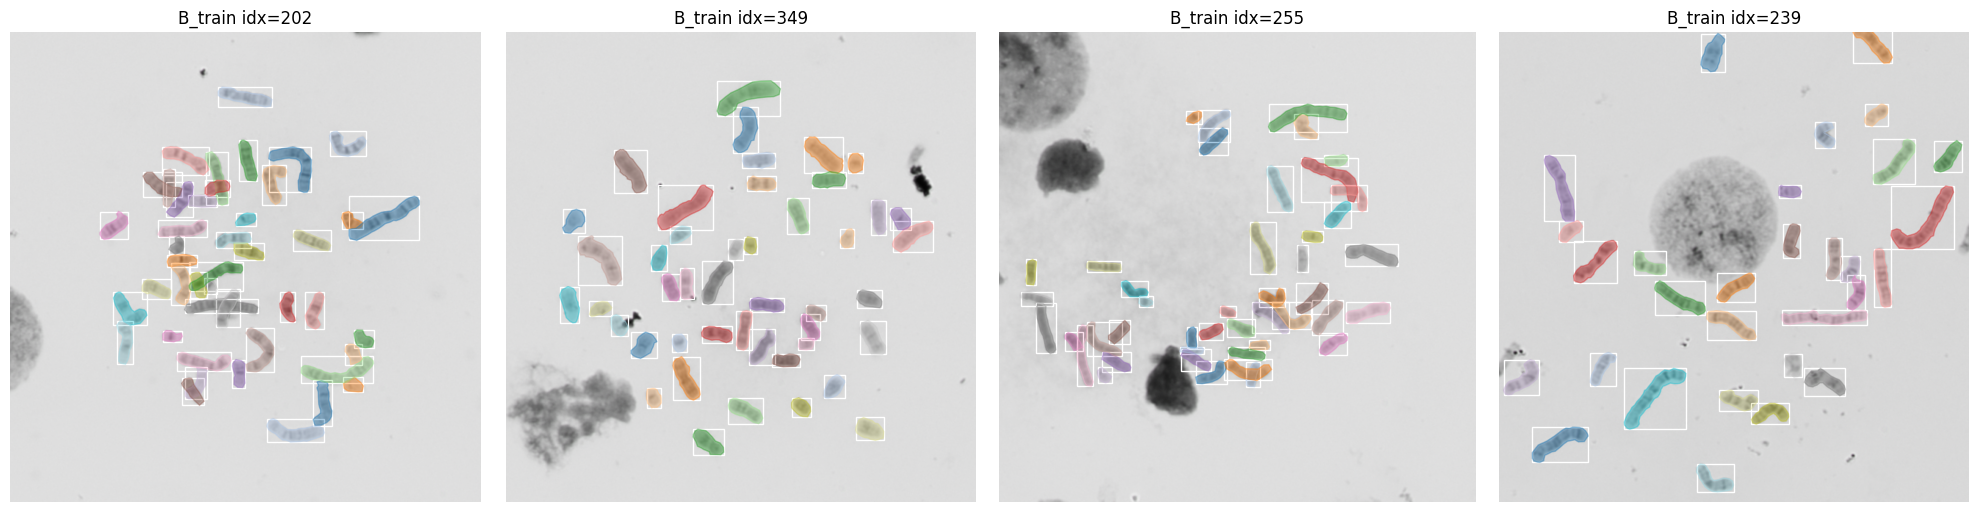

In [3]:
def show_B_instances(dataset, n=4, alpha=0.4):
    idxs = random.sample(range(len(dataset)), n)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))
    if n == 1:
        axes = [axes]

    cmap = plt.cm.get_cmap("tab20", 20)

    for ax, idx in zip(axes, idxs):
        img_t, target = dataset[idx]

        img = img_t * 0.5 + 0.5
        img = img.permute(1, 2, 0).cpu().numpy()
        img = np.clip(img, 0, 1)
        h_resized, w_resized = img.shape[:2]

        ax.imshow(img)

        for box in target["boxes"]:
            x1, y1, x2, y2 = box.tolist()
            w, h = x2 - x1, y2 - y1
            rect = patches.Rectangle(
                (x1, y1),
                w, h,
                linewidth=1.0,
                edgecolor="white",
                facecolor="none",
            )
            ax.add_patch(rect)


        jpath = dataset.json_files[idx]
        with open(jpath, encoding="utf-8") as f:
            ann = json.load(f)

        orig_w = ann.get("imageWidth", w_resized)
        orig_h = ann.get("imageHeight", h_resized)

        sx = w_resized / orig_w
        sy = h_resized / orig_h


        shapes = ann.get("shapes", [])
        for inst_id, sh in enumerate(shapes):
            pts = np.array(sh["points"], dtype=np.float32)
            pts[:, 0] *= sx
            pts[:, 1] *= sy

            color = cmap(inst_id % cmap.N)
            poly = Polygon(
                pts,
                closed=True,
                facecolor=color,
                edgecolor=color,
                alpha=alpha,
                linewidth=1.0,
            )
            ax.add_patch(poly)

        ax.set_title(f"B_train idx={idx}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()



show_B_instances(ds_b_train, n=4)